# Database Search in Sequence Analysis

## Table of content

1. [Database Search in Sequence Anaysis](#Database-Search-in-Sequence-Analysis)
   1. [Table of content](#Table-of-content)
2. [Rational](#Rational)
3. [Large-Scale Lemma](#Large-Scale-Lemma)
4. [FastA](#FastA)
   1. [FastA Webservices](#FastA-Webservices)
5. [BLAST](#BLAST)
   1. [BLAST Webservices](#BLAST-Webservices)
7. [Exercises](#Exercises)
   1. [Exercise 1 - FastA](#Exercise-1---FastA)

# Rational

To gather as much infiormation about our sequence as possible we compare it to already known and analyzed sequences to databases like UniProt/SwissProt

- need specialized algorithms to look for similar / homologous sequences
- those are much more diverse, we want sequences that are even just similar not completely identical
- extremely large scale!!

# Large-Scale Lemma

The Large-Scale Lemma refers to the problem that in a very large database each arbitrary sequence can be found with great probability, even though it has nothing to do with our sequence.

The E-value represents the anticipated number of alignments with the same score as our result in a random database

- depends on length of query size
- depends on size of database
- example: E-value of 0.05 means that there is a 5 in 100 chance of the alignment occurring by chance alone
- supposed to be as near as 0 as possible
  - E-value < 10e-100: identical sequence
  - 10e-100 < E-value < 10e-50: Almost identical sequences
  - 10e-50 < E-value < 10e-10: Closely related sequences
  - 10e-10 < E-value < 1: potential homologue sequences (gray area)
  - E-value > 1 Proteins are most likely not related
  - E-value > 10 Hits are most likely junk unless the query sequence is very short

# FastA

- searches for a match to a given nucleotide or aa sequence in a database
- not calculating optimal alignment!
- largely heuristic and therefore fast

Algorithm:

- splitting up the sequence in a k-mer (aa k=2, nucleotides k=4-6)
- search for regions in the database that are identical with the k-mers
- find the best regions containing the fragments and score them according to s substitution matrix
- combine the fragments by adding gaps between them for an approximate alignment
- if the approximate alignment is better than a given threshold an optimal pairwise alignment is calculated and hadned over

**Step 1:**

- the sequence is split up into length
  - 1-2 for proteins
  - 4-6 for nucleotides
- these k-mers overlap
- the database sequences are matched with the kmers in an alignment matrix
- each hit even of a single kmer is a diagonal in this matrix, several kmers following each other lead to longer ,i.e. better, diagonals
- only matrices with at least x (I think 10) diagonals (even just a single kmer hit) are considered
- if a matrix is considered the 10 longest diagonals are taken to the next step

**Step 2:**

- the ten regions that were saved in step 1 are analyzed again
- they are rescored using BLOSUM 50 or another matrix depending on the parameters you define
   - the different match scores of these diagonals are added together
- The diagonal that produces the best score is called Init 1 and the values of these Init 1 regions are used to rank all found sequences up to this point

**Step 3:**

- the high scoring regions are combined to form an approximate aligbment
- along the main diagonal, including the Init 1 region
- the approximate alignment is done by introducing gaps with harsh gap penalties
  - open gap penalty -10, gap-extesion penalty -2
- only approximate alignments that score better than a certain threshold are taken into account as hits
- we cannot *directly* influence this threshold

**Step 4:**

- the sequences available after Steps1-3 are now used to calculate an optimal alignment
- uses an adjusted version of thr Smith-Waterman algorithm
- takes the already identified diagonals and creates the alignment around them
- results returned depend on the settings, per default 50 sequences

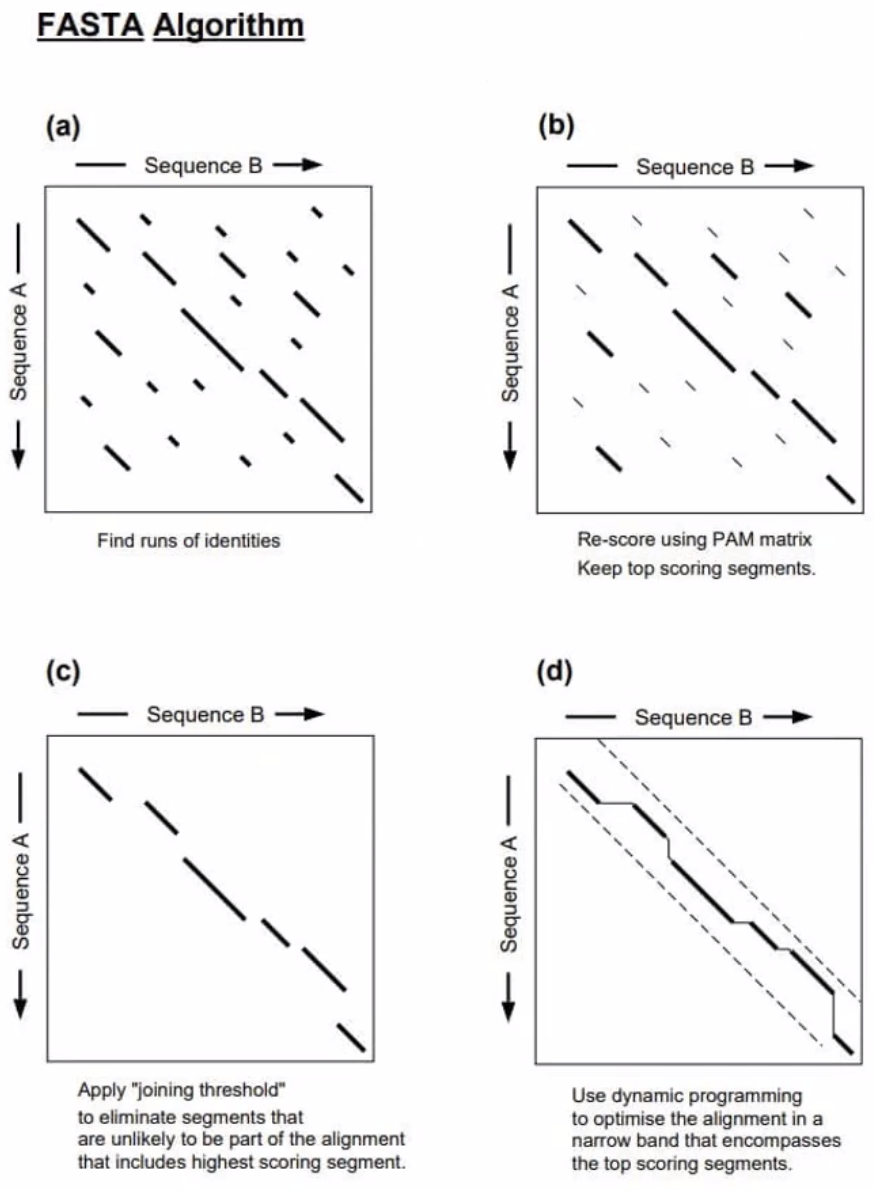

## FastA Webservices

https://www.ebi.ac.uk/jdispatcher/sss/fasta

The web page allows us to adjust the search by:

- Using different databases
  - at the top of the page
  - default UniProtKB/SwissProt
  - start with SwissProt, if not enough hits continue with UniProt Knowledgebase
- Adjusting the search parameter
  - MATRIX: default is blossum50, BLOSUM62 is often better -> try both
  - Gap penalties: use the default values
  - KTUP: k-mer size (default for aa: 2)
- Adjusting the number of results
  - SCORES: how many results to get back at maximum (default 50)
  - ALIGNMETS: how many optimal aligments should be calculated for the result (<= SCORES), for how many of the scores do you want an optimal alignment done
- Using different Algorithms
- more details: https://www.ebi.ac.uk/seqdb/confluence/display/JDSAT/FASTA+Help+and+Documentation


# BLAST

Basic Local Alognment Search Tool

- Idea: Only words that probably didn’t evolve randomly are considered
- The “Matchscore” from a substitution matrix of the word or k-mer is his T-Score
- The T-Score has to be higher than a threshold T to be significant and considered further
  - That means instead of running a search will all k-mers from our query sequence we run the search only with specific k-mers
  - For example a k-mer like AAA would NOT be used by BLAST but by FastA

**Step1: Library Generation**

- library of k-mers with a high enough T-score and kmers similar to these
- T is 11 or 13
- all potential neighbors (similar k-mers with only 1-2 substitutions) are also added

**Step2: Seeding**

- k-mers aer matched exactly to the seqeucnes of the database
- process = seeding, alignment of k-mer and query sequence = seed
- seed is elongated in both directions looking for positive scores with the substitution matrix
- if the extended seed is big enough it is a Maximal Segment Pair (MSP) and taken to the next step

**Step3: Chaining**

- combining multiple MSAs to create High Scoring Pairs (HSPs)
- done using a banded Alignment algorithm to create an approximate alignment
- only high enough HSPs are returned

## Blast Webservices

https://blast.ncbi.nlm.nih.gov/Blast.cgi

- different version:
  - protein
  - nucleotide
  - protein -> nucleotide (translational)
  - nuceotide -> protein (translational)
- possible to upload files with several sequences, an individual search is done for each sequence
- database
  - default: non-redundant protein sequences (NCBI)
  - better to switch to SwissProt!

General parameters

- Max target sequence = how many outputs
- Word size = k-mer size
- Matrix and gap costs as before

# Exercises

## Exercise 1 - FastA

- You have different fasta files containing one sequence each
- For at least two sequences run FastA searches using the parameters shown in the table on the right
- Are their any differences between the Search Runs?

|Run |Parameters |Results|
|--|--|--|
|Run 1| Default (BLOSUM50) |50|
|Run 2| BLOSUM62 |50|
|Run 3| BLOSUM80 |50|
|Run 4| PAM250 |50|
|Run 5| PAM120 |50|
|Run 6 |MDM20 |50|
|Run 7| VTML80 |50|
|Run 8| BLOSUM50 but no gap penalties |50|
|Run 9| BLOSUM50 but highest gap penalties |50|
|Run 10| Default |250|
|Run 11| Default |100|

**Run1 P41221 - BLOSUM50**
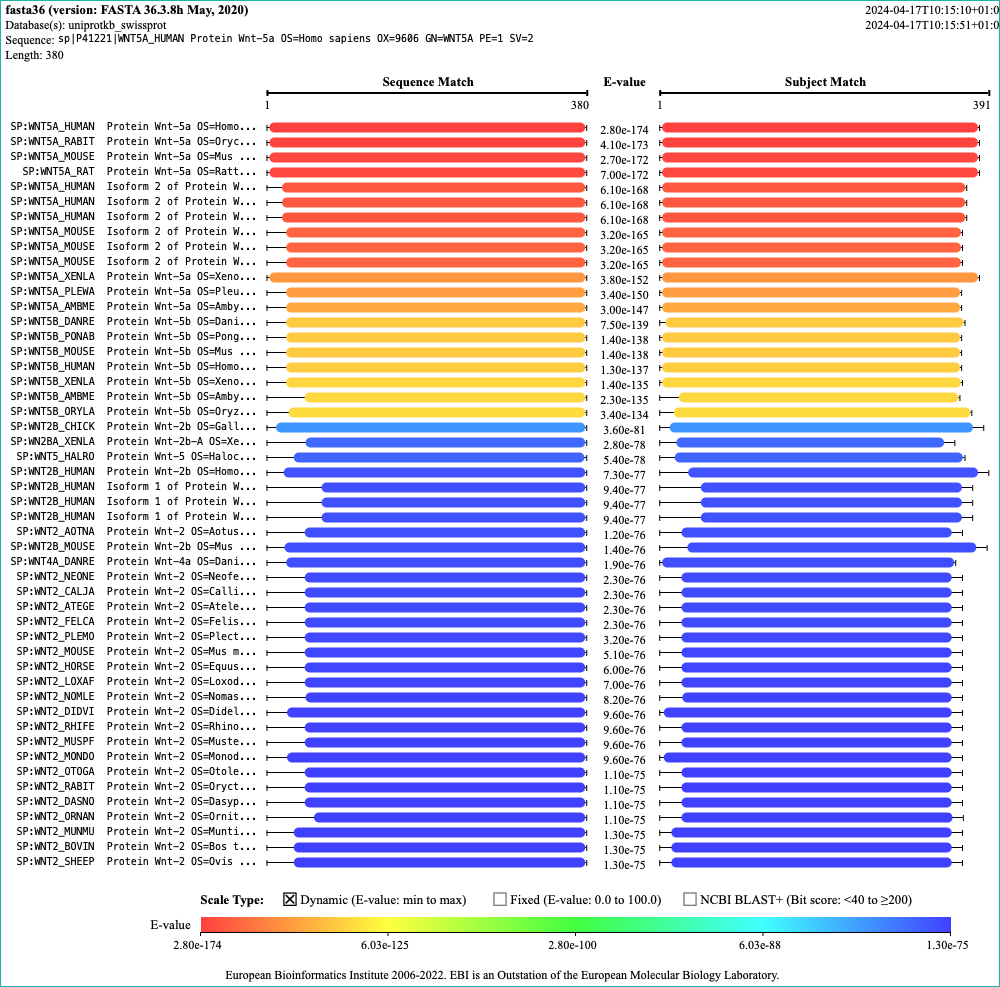

**Run2 P41221 - BLOSUM62**
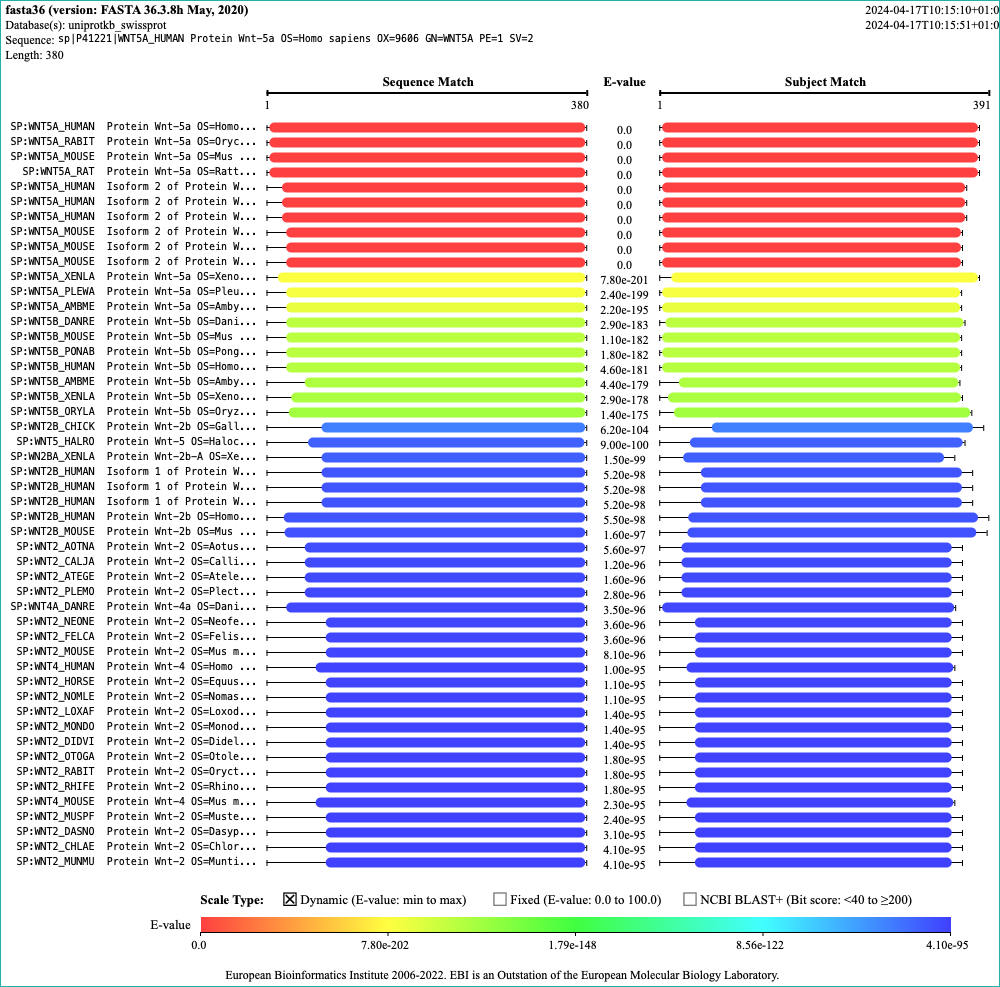

**Run8 P41221 - BLOSUM50 no gap penalties**
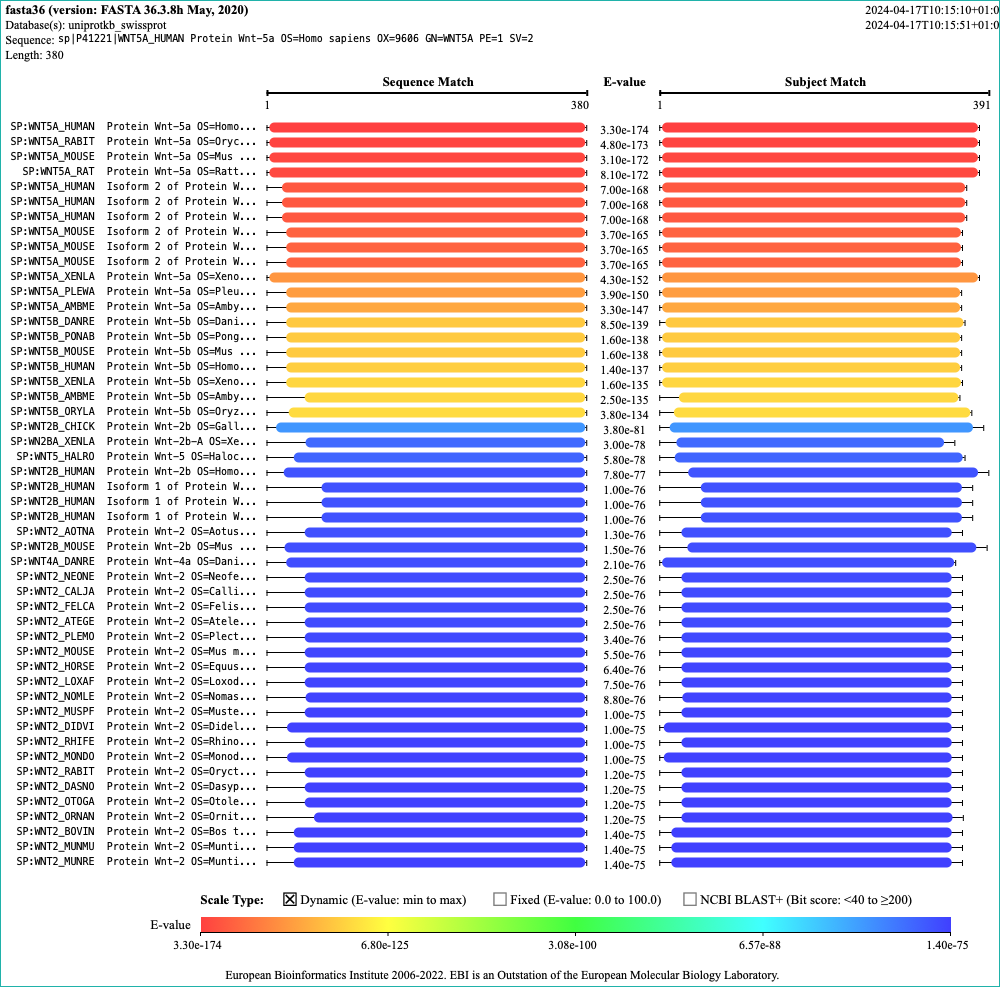

**Run9 P41221 - BLOSUM50 max gap penalties**
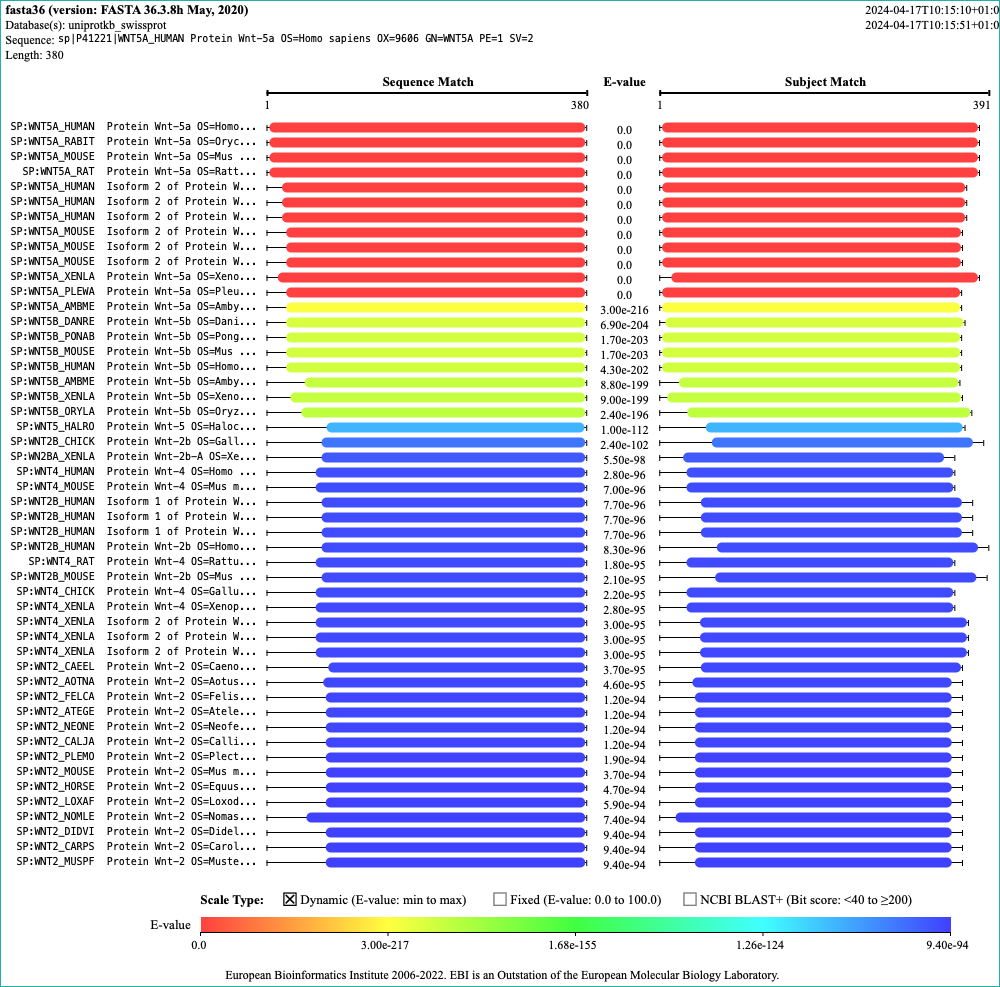